In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal,seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [3]:
macau = pd.read_csv('Macau-2022.csv', index_col='date', parse_dates = ['date'])
macau = macau.fillna(method="ffill")
macau.head()

,arrival
date,
2011-01-01,2076066
2011-02-01,2164249
2011-03-01,2190865
2011-04-01,2338449
2011-05-01,2295551


In [4]:
macau.tail()

,arrival
date,
2021-10-01,328245
2021-11-01,801300
2021-12-01,820870
2022-01-01,694430
2022-02-01,655505


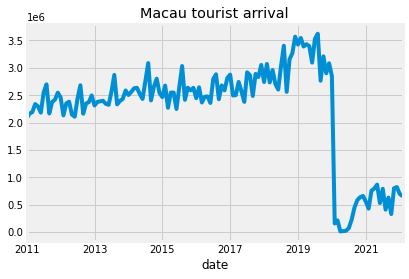

In [5]:
macau["arrival"].plot()
plt.title('Macau tourist arrival')
plt.show()

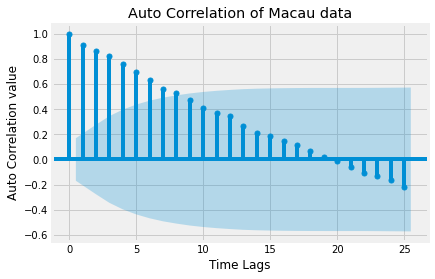

In [12]:
plot_acf(macau["arrival"], lags=25, title="Auto Correlation of Macau data")
plt.xlabel("Time Lags")
plt.ylabel("Auto Correlation value")
plt.show()

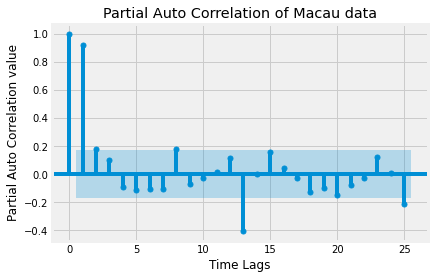

In [13]:
plot_pacf(macau["arrival"], lags=25, title="Partial Auto Correlation of Macau data")
plt.xlabel("Time Lags")
plt.ylabel("Partial Auto Correlation value")
plt.show()

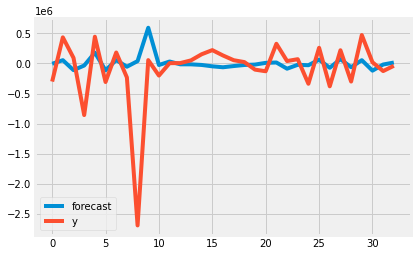

In [4]:
#Prediction using Auto Regressive model with lag 1
arrivals = ARMA(macau["arrival"].diff().iloc[1:].values, order=(1,0))
result = arrivals.fit()
result.plot_predict(start=100, end=132)
plt.show()

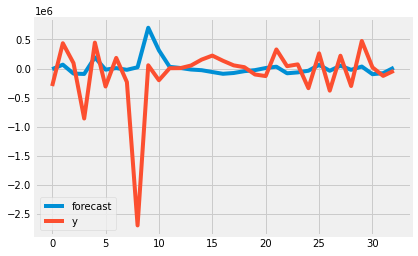

In [5]:
#Prediction using Auto Regressive model with lag 2
arrivals = ARMA(macau["arrival"].diff().iloc[1:].values, order=(2,0))
result = arrivals.fit()
result.plot_predict(start=100, end=132)
plt.show()

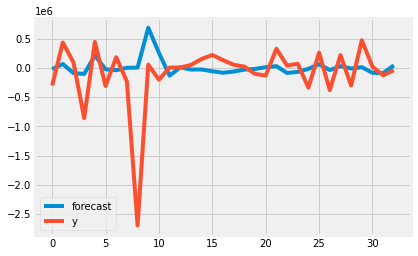

In [6]:
#Prediction using Auto Regressive model with lag 3
arrivals = ARMA(macau["arrival"].diff().iloc[1:].values, order=(3,0))
result = arrivals.fit()
result.plot_predict(start=100, end=132)
plt.show()

In [7]:
print('MAPE: ', mean_absolute_percentage_error(macau["arrival"].diff().iloc[100:132].values, result.predict(start=100,end=131)))

MAPE:  1.5822168791924083


In [8]:
print('RMSE: ', math.sqrt(mean_squared_error(macau["arrival"].diff().iloc[100:132].values, result.predict(start=100,end=131))))

RMSE:  679345.3374879719


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  133
Model:                     ARMA(0, 3)   Log Likelihood               -1884.306
Method:                       css-mle   S.D. of innovations         343967.760
Date:                Sun, 01 May 2022   AIC                           3778.612
Time:                        15:53:49   BIC                           3793.063
Sample:                             0   HQIC                          3784.484
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.068e+04   2.49e+04     -0.429      0.668   -5.94e+04    3.81e+04
ma.L1.y       -0.2590      0.086     -3.007      0.003      -0.428      -0.090
ma.L2.y       -0.0418      0.083     -0.501      0.6

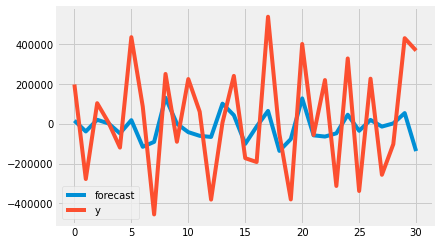

In [9]:
model = ARMA(macau["arrival"].diff().iloc[1:].values,order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=60, end=90)
plt.show()

In [10]:
print('MAPE: ', mean_absolute_percentage_error(macau["arrival"].diff().iloc[100:132].values, result.predict(start=100,end=131)))

MAPE:  2.8786640839136304


In [11]:
print('RMSE: ', math.sqrt(mean_squared_error(macau["arrival"].diff().iloc[100:132].values, result.predict(start=100,end=131))))

RMSE:  686751.0048171072


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  133
Model:                     ARMA(3, 3)   Log Likelihood               -1881.995
Method:                       css-mle   S.D. of innovations         332463.711
Date:                Sun, 01 May 2022   AIC                           3779.991
Time:                        15:53:50   BIC                           3803.114
Sample:                             0   HQIC                          3789.387
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.068e+04   2.77e+04     -0.386      0.699   -6.49e+04    4.36e+04
ar.L1.y       -0.0473      0.054     -0.877      0.381      -0.153       0.058
ar.L2.y        0.1240      0.057      2.192      0.0

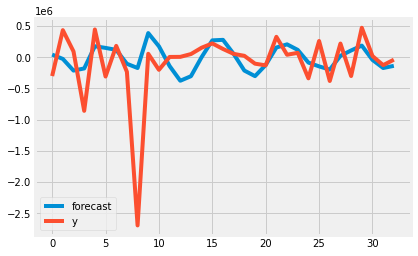

In [12]:

model = ARMA(macau["arrival"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=100, end=132)
plt.show()

In [13]:
print('MAPE: ', mean_absolute_percentage_error(macau["arrival"].diff().iloc[100:132].values, result.predict(start=100,end=131)))

MAPE:  5.75610575212259


In [14]:
print('RMSE: ', math.sqrt(mean_squared_error(macau["arrival"].diff().iloc[100:132].values, result.predict(start=100,end=131))))

RMSE:  638584.1725272881


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  132
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1868.701
Method:                       css-mle   S.D. of innovations         328292.049
Date:                Sun, 01 May 2022   AIC                           3753.402
Time:                        15:53:51   BIC                           3776.464
Sample:                             1   HQIC                          3762.773
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -816.3999    662.473     -1.232      0.218   -2114.823     482.023
ar.L1.D.y     -1.0895      0.095    -11.434      0.000      -1.276      -0.903
ar.L2.D.y     -1.0788      0.097    -11.126      0.0

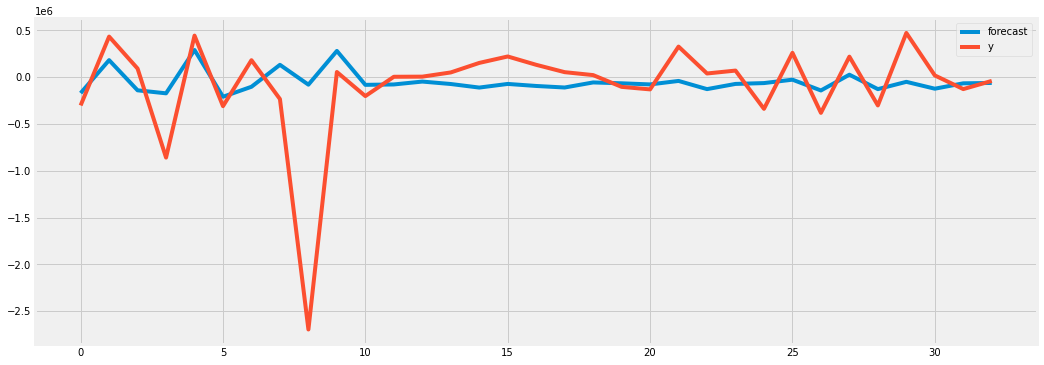

In [15]:
rcParams['figure.figsize'] = 16, 6
model = ARIMA(macau["arrival"].diff().iloc[1:].values, order=(3,1,3))
result = model.fit()
print(result.summary())
result.plot_predict(start=100, end=132)
plt.show()

In [16]:
print('MAPE: ', mean_absolute_percentage_error(macau["arrival"].diff().iloc[100:132].values, result.predict(start=100,end=131)))

MAPE:  3.207140364865346


In [17]:
print('RMSE: ', math.sqrt(mean_squared_error(macau["arrival"].diff().iloc[100:132].values, result.predict(start=100,end=131))))

RMSE:  1178311.4847650058


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  133
Model:               SARIMAX(3, 0, 3)   Log Likelihood               -1881.902
Date:                Sun, 01 May 2022   AIC                           3779.804
Time:                        15:53:52   BIC                           3802.927
Sample:                             0   HQIC                          3789.200
                                - 133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.802e+04   7.48e+04     -0.241      0.810   -1.65e+05    1.29e+05
ar.L1         -0.0097      0.150     -0.065      0.948      -0.303       0.284
ar.L2          0.0932      0.187      0.498      0.6

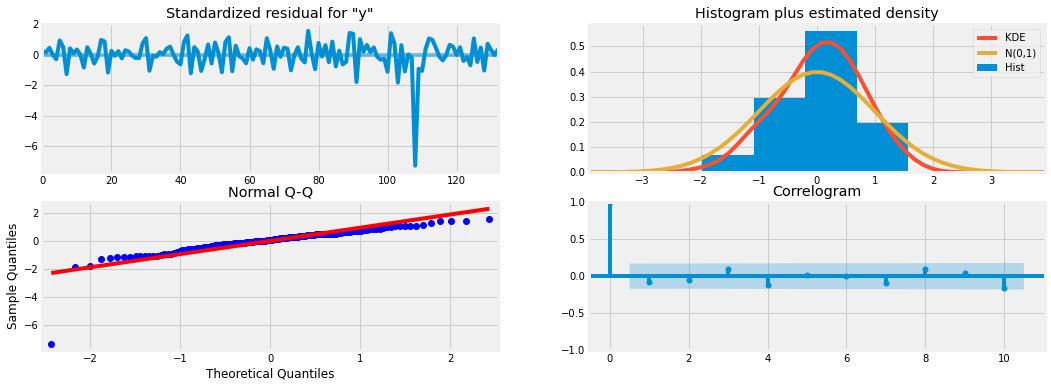

In [18]:
# SARIMAX model
train_sample = macau["arrival"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(3,0,3),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=99)
result.plot_diagnostics()
# calculating error
mape = mean_absolute_percentage_error(train_sample[1:101], predicted_result)
print("The Mean Absolute Percentage Error is {}.".format(mape))

In [19]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    mctest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF: ",mctest[0])
    print("2. P-Value: ",mctest[1])
    print("3. Num of lags: ", mctest[2])
    print("4. Num of observations used for ADF regression and Critical value calculation: ",mctest[3])
    print("5. Critical values: ")
    for key, val in mctest[4].items():
        print("\t",key,": ",val)

In [20]:
ad_test(macau['arrival'])

1. ADF:  -1.8404961376118276
2. P-Value:  0.3605497857405684
3. Num of lags:  12
4. Num of observations used for ADF regression and Critical value calculation:  121
5. Critical values: 
	 1% :  -3.485585145896754
	 5% :  -2.885738566292665
	 10% :  -2.5796759080663887


In [21]:
from pmdarima import auto_arima
import warnings 
warnings.filterwarnings("ignore")

In [22]:
stepwise_fit = auto_arima(macau['arrival'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3783.855, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3782.981, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3780.012, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3779.444, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3781.103, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3781.436, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3781.444, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3782.767, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3777.417, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3779.369, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3779.321, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3778.097, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3780.825, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.832 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  134
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1886.708
Date:                Sun, 01 May 2022   AIC                           3777.417
Time:                        15:53:54   BIC                           3783.197
Sample:                             0   HQIC                          3779.766
                                - 134                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1941      0.065     -2.997      0.003      -0.321      -0.067
sigma2      1.243e+11   2.54e-13   4.89e+23      0.000    1.24e+11    1.24e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):              3895.20
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               4.50   Skew:                            -3.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.52e+38. Standard errors may be unstable.
"""

In [23]:
print(macau.shape)
train=macau.iloc[:100]
test = macau.iloc[100:]
print(train.shape, test.shape)

(134, 1)
(100, 1) (34, 1)


In [24]:
model = ARIMA(train['arrival'],order=(0,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.arrival   No. Observations:                   99
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1355.247
Method:                       css-mle   S.D. of innovations         212276.182
Date:                Sun, 01 May 2022   AIC                           2716.493
Time:                        15:53:54   BIC                           2724.278
Sample:                    02-01-2011   HQIC                          2719.643
                         - 04-01-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             1.23e+04   4920.619      2.500      0.012    2657.670    2.19e+04
ma.L1.D.arrival    -0.7821      0.063    -12.502      0.000      -0.905      -0.659
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2786           +0.0000j            1.2786            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ='levels')
print(pred)

2019-05-01    3.381770e+06
2019-06-01    3.394072e+06
2019-07-01    3.406374e+06
2019-08-01    3.418676e+06
2019-09-01    3.430978e+06
2019-10-01    3.443280e+06
2019-11-01    3.455582e+06
2019-12-01    3.467884e+06
2020-01-01    3.480186e+06
2020-02-01    3.492487e+06
2020-03-01    3.504789e+06
2020-04-01    3.517091e+06
2020-05-01    3.529393e+06
2020-06-01    3.541695e+06
2020-07-01    3.553997e+06
2020-08-01    3.566299e+06
2020-09-01    3.578601e+06
2020-10-01    3.590903e+06
2020-11-01    3.603205e+06
2020-12-01    3.615506e+06
2021-01-01    3.627808e+06
2021-02-01    3.640110e+06
2021-03-01    3.652412e+06
2021-04-01    3.664714e+06
2021-05-01    3.677016e+06
2021-06-01    3.689318e+06
2021-07-01    3.701620e+06
2021-08-01    3.713922e+06
2021-09-01    3.726224e+06
2021-10-01    3.738526e+06
2021-11-01    3.750827e+06
2021-12-01    3.763129e+06
2022-01-01    3.775431e+06
2022-02-01    3.787733e+06
Freq: MS, dtype: float64


<AxesSubplot:xlabel='date'>

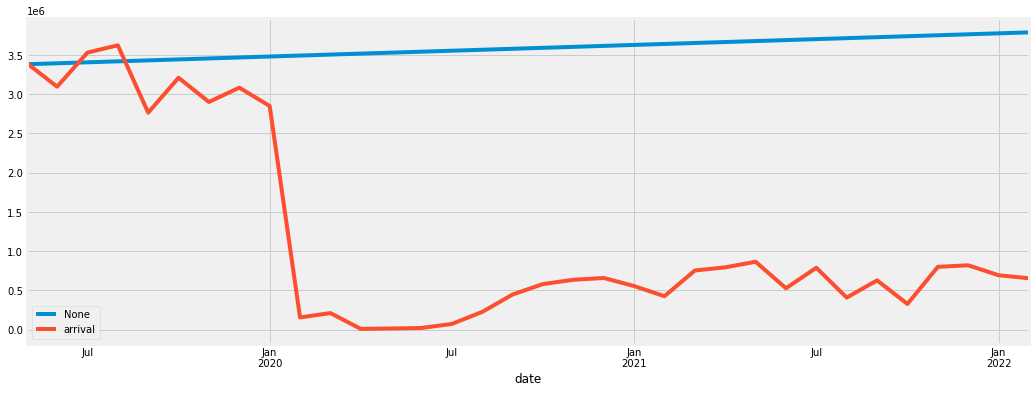

In [26]:
pred.plot(legend=True)
test['arrival'].plot(legend=True)